# Connecticut Real Estate 2011-2021
### Aaron 'Asa' Sherwyn
# 01 Cleaning
1. Imports and Set-up
2. General Exploration
    - Frequency counts of select columns
3. Cleaning
    - Relevance checks
    - Type checks
    - Consistency checks
    - Outlier checks
    - Missing values checks
    - Duplicate checks
    - Contradictions checks
4. Exports

## 1. Imports and Set-up

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#Creating a path to the root directory for this project
path = r'C:\Users\theva\OneDrive\CareerFoundry\Data Immersion\A6\Connecticut Real Estate 2001-2020'

In [3]:
#Importing main dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Real_Estate_Sales_2001-2020_GL.csv'))

C:\Users\theva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#Increasing display limit
pd.set_option('display.max_rows', 200)

## 2. General Exploration

In [5]:
#Checking head
df.head(20)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN
5,200109,2020,12/9/2020,Avon,57 FAR HILLS DRIVE,847520,1250000.0,0.678000,Residential,Single Family,NaN,NaN,NaN,NaN
6,2020180,2020,3/1/2021,Berlin,1539 FARMINGTON AVE,234200,130000.0,1.801500,Residential,Two Family,08 - Part Interest,NaN,NaN,NaN
7,2020313,2020,7/1/2021,Berlin,216 WATCH HILL RD,412000,677500.0,0.608100,Residential,Single Family,NaN,NaN,NaN,NaN
8,200097,2020,6/4/2021,Bethany,23 AMITY RD,511000,795000.0,0.642700,Commercial,NaN,NaN,NaN,NaN,NaN
9,20139,2020,12/16/2020,Bethel,16 DEEPWOOD DRIVE,171360,335000.0,0.511500,Residential,Single Family,NaN,NaN,NaN,NaN


In [6]:
df.tail(20)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
997193,10167,2001,5/1/2002,Windsor Locks,46 DIBBLE HOLW,84200,95000.0,0.886316,NaN,NaN,1.0,NaN,NaN,NaN
997194,10291,2001,4/24/2002,Westport,11 BLACK BIRCH RD,617900,1143750.0,0.540240,NaN,NaN,NaN,NaN,NaN,NaN
997195,10249,2001,3/1/2002,Wethersfield,995 RIDGE RD,122800,224900.0,0.546020,NaN,NaN,NaN,NaN,NaN,POINT (-72.68084 41.69292)
997196,10341,2001,5/1/2002,Wethersfield,158 OLD COMMON,146800,268000.0,0.547761,NaN,NaN,NaN,NaN,NaN,NaN
997197,10264,2001,8/23/2002,Winchester,WINCHESTER RD W RD,25140,53000.0,0.474340,NaN,NaN,6.0,NaN,NaN,POINT (-73.13455 41.90015)
997198,11134,2001,9/25/2002,West Haven,25 RODNEY ST,60480,147900.0,0.408925,NaN,NaN,NaN,NaN,NaN,NaN
997199,10300,2001,5/1/2002,Westport,5 PARTRICK RD,466700,998000.0,0.467635,NaN,NaN,NaN,NaN,NaN,POINT (-73.37593 41.159)
997200,10179,2001,6/4/2002,Woodstock,BUNGAY HL RD,21230,32000.0,0.663438,NaN,NaN,NaN,NaN,NaN,NaN
997201,10440,2001,6/28/2002,Westport,14 WINDING LN,476400,1100000.0,0.433091,NaN,NaN,NaN,NaN,NaN,NaN
997202,10491,2001,8/30/2002,Wethersfield,254 HIGHCREST RD,152600,319900.0,0.477024,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Checking data types of variables
df.dtypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value        int64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
OPM remarks          object
Location             object
dtype: object

>Notes:</br>
Serial likely won't be needed - a frequency will tell me more.</br>
Date Recorded should be date type and might be useful to __calculate day of week.__</br>
Address might not be needed.</br>
Sales Ratio = Assessed Value / Sale Amount.</br>
Non Use Code, Assessor Remarks, OPM remarks, and Location can be dropped as they contain abundant NaN values and/or are not needed for the analysis.</br>
__Longitude and latitude will need to be found for each town.__

In [8]:
#Checking shape
df.shape

(997213, 14)

In [9]:
#Checking general range of values
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,997213.00000,997213.00000,997213.00000,997213.00000,997213.00000
mean,431186.40960,2010.18983,279143.66539,391151.18354,10.44637
std,6549219.17411,6.23788,1670609.85762,5347270.21204,1890.19180
min,0.00000,2001.00000,0.00000,0.00000,0.00000
25%,30444.00000,2004.00000,87600.00000,140000.00000,0.48670
50%,70303.00000,2010.00000,138390.00000,225000.00000,0.62460
75%,151878.00000,2016.00000,225560.00000,365000.00000,0.78528
max,2000500023.00000,2020.00000,881510000.00000,5000000000.00000,1226420.00000


>Notes: Will need to look into outlier values.

### Frequency counts of select columns

In [10]:
df['Serial Number'].value_counts()

10002     172
10018     172
10010     172
10030     171
10015     171
         ... 
167850      1
8391        1
167554      1
800781      1
116531      1
Name: Serial Number, Length: 83537, dtype: int64

>Note: Will keep Serial Number as it might signify resales of properties or duplicate values.

In [11]:
df['List Year'].value_counts().sort_index()

2001    59584
2002    59682
2003    64239
2004    84056
2005    61602
2006    48785
2007    35617
2008    32735
2009    42508
2010    33491
2011    31065
2012    35973
2013    39943
2014    49563
2015    46651
2016    49773
2017    45691
2018    50709
2019    58954
2020    66592
Name: List Year, dtype: int64

>Notes: Only need 2010-2020 (which is sale dates 2011-2021)

In [12]:
df['Town'].value_counts().sort_index()

***Unknown***           1
Andover               889
Ansonia              4445
Ashford              1385
Avon                 7029
Barkhamsted          1030
Beacon Falls         1890
Berlin               5643
Bethany              1616
Bethel               5598
Bethlehem             888
Bloomfield           5632
Bolton               1387
Bozrah                547
Branford             8714
Bridgeport          34201
Bridgewater           555
Bristol             16915
Brookfield           5727
Brooklyn             2455
Burlington           3154
Canaan                429
Canterbury           1369
Canton               3730
Chaplin               594
Cheshire             7707
Chester              1053
Clinton              4589
Colchester           4439
Colebrook             519
Columbia             1636
Cornwall              614
Coventry             4107
Cromwell             5056
Danbury             20350
Darien               6545
Deep River           1254
Derby                3282
Durham      

> Notes: 1 Unknown will be dropped.

In [13]:
df['Property Type'].value_counts().sort_index()

Apartments           486
Commercial          1981
Condo             105420
Four Family         2150
Industrial           228
Public Utility         5
Residential        60728
Single Family     401612
Three Family       12586
Two Family         26408
Vacant Land         3163
Name: Property Type, dtype: int64

In [14]:
df['Residential Type'].value_counts().sort_index()

Condo            117780
Four Family        2418
Single Family    445016
Three Family      14081
Two Family        29609
Name: Residential Type, dtype: int64

>Notes: All Residential Types contain more occurences than their corresponding Property Type.

## 3. Cleaning

### Relevance checks

In [15]:
#dropping Non Use Code, Assessor Remarks, and OPM remarks columns as they are not needed for this analysis.
df_relevant = df[[
    'Serial Number',
    'List Year',
    'Date Recorded',
    'Town',
    'Address',
    'Assessed Value',
    'Sale Amount',
    'Sales Ratio',
    'Property Type',
    'Residential Type'
    ]]

In [16]:
#checking df_relevant shape
df_relevant.shape

(997213, 10)

In [17]:
#dropping years that are not timely enough for the analysis
df_timely = df_relevant.loc[df_relevant['List Year'] > 2009]

In [18]:
#checking new df shape
df_timely.shape

(508405, 10)

In [19]:
#checking new df shape
df_timely.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family
5,200109,2020,12/9/2020,Avon,57 FAR HILLS DRIVE,847520,1250000.0,0.6780,Residential,Single Family
6,2020180,2020,3/1/2021,Berlin,1539 FARMINGTON AVE,234200,130000.0,1.8015,Residential,Two Family
7,2020313,2020,7/1/2021,Berlin,216 WATCH HILL RD,412000,677500.0,0.6081,Residential,Single Family
8,200097,2020,6/4/2021,Bethany,23 AMITY RD,511000,795000.0,0.6427,Commercial,NaN
9,20139,2020,12/16/2020,Bethel,16 DEEPWOOD DRIVE,171360,335000.0,0.5115,Residential,Single Family


In [20]:
#checking new df shape
df_timely.tail(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
508395,100358,2010,4/29/2011,Stratford,190 NICHOLS AVE,160510,221000.0,0.726290,Single Family,Single Family
508396,100169,2010,6/29/2011,Plainville,190 TOMLINSON AVE 3C,131740,149000.0,0.884161,Condo,Condo
508397,100125,2010,1/10/2011,Norwich,246 ROGERS RD,305000,350000.0,0.871429,Single Family,Single Family
508398,10033,2010,11/5/2010,South Windsor,142 SCOTT DR,242690,325000.0,0.746738,Single Family,Single Family
508399,100027,2010,12/20/2010,East Granby,"16 SEYMOUR RD., UNIT 5F",81900,113000.0,0.724779,Condo,Condo
508400,10103,2010,5/26/2011,Seymour,158 SOUTH BENHAM RD,331380,186900.0,1.773034,Single Family,Single Family
508401,100266,2010,7/18/2011,Farmington,45 GARDEN GATE,537330,730000.0,0.736068,Single Family,Single Family
508402,100065,2010,8/2/2011,Lebanon,LAKESIDE DR,54080,46930.0,1.152355,NaN,NaN
508403,100731,2010,5/11/2011,Waterbury,95 ELMWOOD AVE,151590,40000.0,3.789750,Three Family,Three Family
508404,100252,2010,3/31/2011,Meriden,40 LYNN DR,148070,188000.0,0.787606,Single Family,Single Family


>Notes: Dropped Non Use Code, Assessor Remarks, and OPM remarks columns as well as List Years 2001-2009.<br><br>Dropped 3 columns and 488,808 rows.

### Type checks

In [21]:
#changing Date Record to datetime type
df_timely['Date Recorded'] = df_timely['Date Recorded'].astype('datetime64[ns]')

C:\Users\theva\AppData\Local\Temp\ipykernel_7044\1685298420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timely['Date Recorded'] = df_timely['Date Recorded'].astype('datetime64[ns]')


In [22]:
#checking datetime conversion
df_timely.head(20)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,NaN
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family
5,200109,2020,2020-12-09,Avon,57 FAR HILLS DRIVE,847520,1250000.0,0.678000,Residential,Single Family
6,2020180,2020,2021-03-01,Berlin,1539 FARMINGTON AVE,234200,130000.0,1.801500,Residential,Two Family
7,2020313,2020,2021-07-01,Berlin,216 WATCH HILL RD,412000,677500.0,0.608100,Residential,Single Family
8,200097,2020,2021-06-04,Bethany,23 AMITY RD,511000,795000.0,0.642700,Commercial,NaN
9,20139,2020,2020-12-16,Bethel,16 DEEPWOOD DRIVE,171360,335000.0,0.511500,Residential,Single Family


In [23]:
#checking datetime conversion
df_timely.tail(20)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
508385,10006,2010,2010-10-28,Salem,109 STONEWALL ROAD,120350,57750.0,2.083983,NaN,NaN
508386,10055,2010,2010-12-22,North Haven,9 ROBERTA ROAD,168980,190000.0,0.889368,Single Family,Single Family
508387,100846,2010,2011-06-28,Stamford,143 PALMERS HILL ROAD,738830,687500.0,1.074662,Single Family,Single Family
508388,10088,2010,2010-12-20,Groton,1 JOLIET CT,114240,128000.0,0.892500,Single Family,Single Family
508389,10076,2010,2011-03-04,Brookfield,89A LONG MEADOW HILL RD,349480,439000.0,0.796082,Single Family,Single Family
508390,100077,2010,2011-03-07,Old Saybrook,191 INGHAM HILL RD,318000,340000.0,0.935294,Single Family,Single Family
508391,10019,2010,2010-10-29,Watertown,65 EDWARD AVE,161600,170000.0,0.950588,Single Family,Single Family
508392,100170,2010,2010-12-20,West Hartford,534 SOUTH QUAKER LANE,122700,187000.0,0.656150,Single Family,Single Family
508393,100114,2010,2010-10-22,Newington,0 MAIN STREET,62770,130000.0,0.482846,NaN,NaN
508394,10423,2010,2011-05-17,Hartford,185 ASYLUM ST,58119809,2100000.0,27.676100,NaN,NaN


In [24]:
#checking datetime conversion
df_timely.dtypes

Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value               int64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
dtype: object

>Notes: Date Record changed to datetime type yyyy-mm-dd format

In [25]:
#Check for mixed data types
for col in df_timely.columns.tolist():
  weird = (df_timely[[col]].applymap(type) != df_timely[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_timely[weird]) > 0:
    print (col, ' mixed')
  else: print(col, ' consistent')

Serial Number  consistent
List Year  consistent
Date Recorded  consistent
Town  consistent
Address  mixed
Assessed Value  consistent
Sale Amount  consistent
Sales Ratio  consistent
Property Type  mixed
Residential Type  mixed


In [26]:
#converting Address column to strings
df_timely['Address'] = df_timely['Address'].astype('str')

C:\Users\theva\AppData\Local\Temp\ipykernel_7044\2127695073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timely['Address'] = df_timely['Address'].astype('str')


In [27]:
#converting Property Type to strings
df_timely['Property Type'] = df_timely['Property Type'].astype('str')

C:\Users\theva\AppData\Local\Temp\ipykernel_7044\4000257881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timely['Property Type'] = df_timely['Property Type'].astype('str')


In [28]:
#converting Residential Type to strings
df_timely['Residential Type'] = df_timely['Residential Type'].astype('str')

C:\Users\theva\AppData\Local\Temp\ipykernel_7044\723266130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timely['Residential Type'] = df_timely['Residential Type'].astype('str')


In [29]:
#Check for implemented changes to mixed data types
for col in df_timely.columns.tolist():
  weird = (df_timely[[col]].applymap(type) != df_timely[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_timely[weird]) > 0:
    print (col, ' mixed')
  else: print(col, ' consistent')

Serial Number  consistent
List Year  consistent
Date Recorded  consistent
Town  consistent
Address  consistent
Assessed Value  consistent
Sale Amount  consistent
Sales Ratio  consistent
Property Type  consistent
Residential Type  consistent


In [30]:
#returning 'nan' strings to actual NaN
df_timely['Address'] = df_timely['Address'].astype(str).replace('nan',np.nan)
df_timely['Property Type'] = df_timely['Property Type'].astype(str).replace('nan',np.nan)
df_timely['Residential Type'] = df_timely['Residential Type'].astype(str).replace('nan',np.nan)

C:\Users\theva\AppData\Local\Temp\ipykernel_7044\694073789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timely['Address'] = df_timely['Address'].astype(str).replace('nan',np.nan)
C:\Users\theva\AppData\Local\Temp\ipykernel_7044\694073789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timely['Property Type'] = df_timely['Property Type'].astype(str).replace('nan',np.nan)
C:\Users\theva\AppData\Local\Temp\ipykernel_7044\694073789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

>Notes: All columns now have consistent data types

### Consistency checks

#### Renaming columns in snake_format
__'Old Name' : 'new_name'__<br>
'Serial Number' : 'serial_number'<br>
'List Year' : 'list_year'<br>
'Date Recorded' : 'date_recorded'<br>
'Town' : 'town'<br>
'Address' : 'address'<br>
'Assessed Value' : 'assessed_value'<br>
'Sale Amount' : 'sale_amount'<br>
'Sales Ratio' : 'sales_ratio'<br>
'Property Type' : 'property_type'<br>
'Residential Type' : 'residential_type'<br>
'Location' : 'location'<br>

In [31]:
#renaming columns
df_timely.rename(columns={
    'Serial Number' : 'serial_number',
    'List Year' : 'list_year',
    'Date Recorded' : 'date_recorded',
    'Town' : 'town',
    'Address' : 'address',
    'Assessed Value' : 'assessed_value',
    'Sale Amount' : 'sale_amount',
    'Sales Ratio' : 'sales_ratio',
    'Property Type' : 'property_type',
    'Residential Type' : 'residential_type',
    'Location' : 'location'},
    inplace=True)

C:\Users\theva\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [32]:
#checing new column names
df_timely.columns

Index(['serial_number', 'list_year', 'date_recorded', 'town', 'address',
       'assessed_value', 'sale_amount', 'sales_ratio', 'property_type',
       'residential_type'],
      dtype='object')

#### Checking for mixed naming structures/formats

In [33]:
df_timely['list_year'].value_counts(dropna=False).sort_index()

2010    33491
2011    31065
2012    35973
2013    39943
2014    49563
2015    46651
2016    49773
2017    45691
2018    50709
2019    58954
2020    66592
Name: list_year, dtype: int64

In [34]:
df_timely['town'].value_counts(dropna=False).sort_index()

Andover               488
Ansonia              2505
Ashford               662
Avon                 3645
Barkhamsted           547
Beacon Falls         1043
Berlin               3118
Bethany               748
Bethel               3153
Bethlehem             458
Bloomfield           2642
Bolton                780
Bozrah                305
Branford             4977
Bridgeport          15413
Bridgewater           331
Bristol              8229
Brookfield           3081
Brooklyn             1339
Burlington           1786
Canaan                234
Canterbury            704
Canton               1845
Chaplin               298
Cheshire             4064
Chester               552
Clinton              2061
Colchester           2200
Colebrook             245
Columbia              842
Cornwall              342
Coventry             2212
Cromwell             2365
Danbury              9901
Darien               3631
Deep River            639
Derby                1508
Durham                907
East Granby 

In [35]:
df_timely['property_type'].value_counts(dropna=False).sort_index()

Apartments           486
Commercial          1981
Condo              75449
Four Family         1664
Industrial           228
Public Utility         5
Residential        60728
Single Family     298747
Three Family        8956
Two Family         19115
Vacant Land         3163
NaN                37883
Name: property_type, dtype: int64

In [36]:
df_timely['residential_type'].value_counts(dropna=False).sort_index()

Condo             87809
Four Family        1932
Single Family    342151
Three Family      10451
Two Family        22316
NaN               43746
Name: residential_type, dtype: int64

>Notes: All structures/formats seem consistent and accurate

### Outlier checks

In [37]:
#Checking for outliers
df_timely.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,serial_number,list_year,assessed_value,sale_amount,sales_ratio
count,508405.00000,508405.00000,508405.00000,508405.00000,508405.00000
mean,780385.07272,2015.65494,324226.24294,428425.26130,2.75242
std,9157721.81862,3.11915,2045073.29549,7415507.58782,395.96594
min,110.00000,2010.00000,0.00000,0.00000,0.00000
25%,110112.00000,2013.00000,107180.00000,140000.00000,0.59140
50%,150197.00000,2016.00000,158900.00000,230000.00000,0.69410
75%,180791.00000,2018.00000,253400.00000,375000.00000,0.86375
max,2000500023.00000,2020.00000,881510000.00000,5000000000.00000,241910.00000


Text(0, 0.5, 'sale_amount')

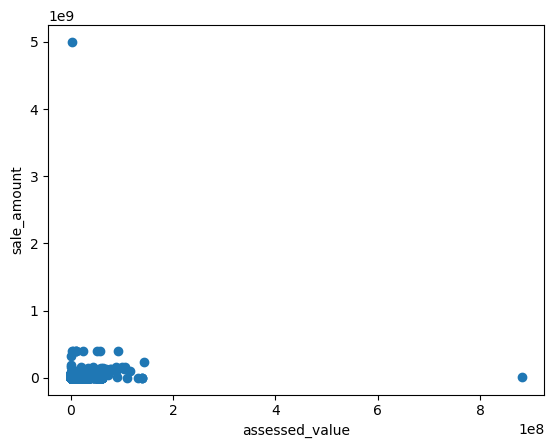

In [38]:
#plotting assessed_value against sale_amount to check for distribution
plt.scatter(df_timely['assessed_value'], df_timely['sale_amount'])
plt.xlabel('assessed_value')
plt.ylabel('sale_amount')

In [39]:
#Examining assessed_value outliers
df_timely.loc[df_timely['assessed_value'] > 200000000]

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
183454,170909,2017,2018-08-15,Hamden,42 WARNER ST,881510000,4680000.0,188.3568,Condo,Condo


In [40]:
#Examining sale_amount outliers
df_timely.loc[df_timely['sale_amount'] > 1000000000]

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
59604,20200091,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530,5.000000e+09,0.000448,Apartments,NaN


>Notes: Both extreme outliers have unusually large or small sales_ratios. That would be a good variable to check next. Also, this data set is not suppose to record sales lower than 2,000 dollars, thus looking at entries with a sale lower than 2,000 is a good idea.<br><br>
Also, The Balance explains that assessed value is almost always lower than market price. https://www.thebalancemoney.com/assessed-value-vs-market-value-what-s-the-difference-5197369#:~:text=The%20tax%20assessor%20for%20your,the%20assessed%20value%20is%20%24225%2C000.
<br><br>
We can structure a preliminary outlier formula of a sales_ratio being greater than Q3+2IQR or less than Q1-2IQR (i.e., sales_ratio > 1.40845 or sales_ratio < 0.0467).

In [41]:
#making a df of records within the normal range (inside the outlier boundries)
inliers = df_timely.loc[(df_timely['sales_ratio'] <= 1.40845) & (df_timely['sales_ratio'] >= 0.0467)]

In [42]:
#making a df of outlier records
outliers = df_timely.loc[(df_timely['sales_ratio'] > 1.40845) | (df_timely['sales_ratio'] < 0.0467)]

In [43]:
#describing normal range records
inliers.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,serial_number,list_year,assessed_value,sale_amount,sales_ratio
count,462462.00000,462462.00000,462462.00000,462462.00000,462462.00000
mean,806257.97219,2015.77995,274686.51199,427638.56679,0.70900
std,9061498.30654,3.09965,906180.52876,1973644.99281,0.21331
min,110.00000,2010.00000,140.00000,720.00000,0.04670
25%,110131.00000,2013.00000,110500.00000,159000.00000,0.58507
50%,150373.00000,2016.00000,162499.50000,245000.00000,0.67880
75%,181453.00000,2019.00000,256690.00000,389315.75000,0.80457
max,2000500023.00000,2020.00000,142858700.00000,395500000.00000,1.40841


Text(0, 0.5, 'sale_amount')

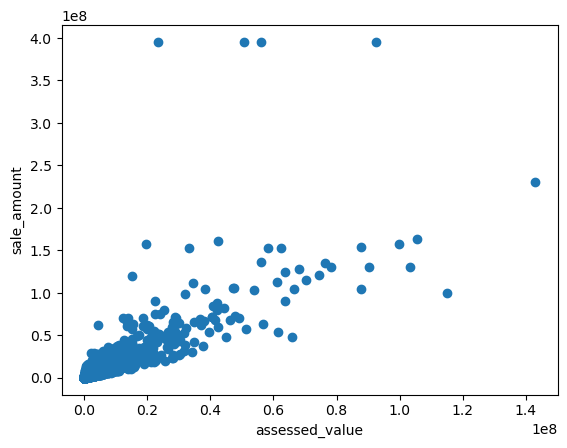

In [44]:
#plotting assessed_value against sale_amount for normal range records
plt.scatter(inliers['assessed_value'], inliers['sale_amount'])
plt.xlabel('assessed_value')
plt.ylabel('sale_amount')

>Notes: sales_amount and assessed_value now adhere more closely to a trend line as expected. Could possibly remove additional outliers with a sales_amount > 300,000,000 as these records lie far outside the expected trend.

In [45]:
#making a slight refinement to the included dataset
inliers2 = inliers.loc[inliers['sale_amount'] < 300000000]

Text(0, 0.5, 'sale_amount')

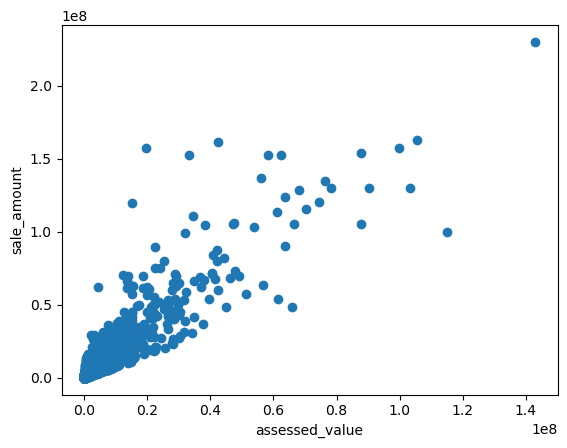

In [46]:
#plotting assessed_value against sale_amount for new normal range records
plt.scatter(inliers2['assessed_value'], inliers2['sale_amount'])
plt.xlabel('assessed_value')
plt.ylabel('sale_amount')

<AxesSubplot:ylabel='Frequency'>

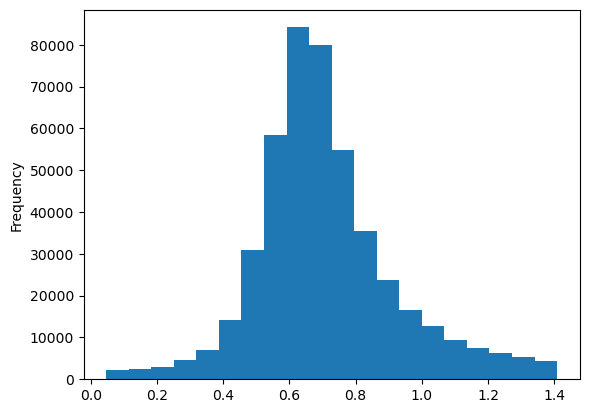

In [47]:
#making a histogram of sales_ratios to check shape
inliers2['sales_ratio'].plot.hist(bins = 20)

In [48]:
#checking new df
inliers2.shape

(462458, 10)

>Notes: the data frame now seems healthfully devoid of outliers.

#### Documentation of the outliers removed from the dataset.

In [49]:
#describing outlier records
outliers.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,serial_number,list_year,assessed_value,sale_amount,sales_ratio
count,45943.00000,45943.00000,45943.00000,45943.00000,45943.00000
mean,519948.60064,2014.39662,822892.91801,436344.12411,23.32150
std,10071660.40951,3.03465,6143544.29199,23860379.64276,1317.04037
min,113.00000,2010.00000,0.00000,0.00000,0.00000
25%,110022.00000,2012.00000,74900.00000,35000.00000,1.54295
50%,140008.00000,2014.00000,121230.00000,62000.00000,1.91453
75%,161085.50000,2017.00000,204100.00000,112979.50000,3.00866
max,1710011174.00000,2020.00000,881510000.00000,5000000000.00000,241910.00000


In [50]:
#outliers shape
outliers.shape

(45943, 10)

Text(0, 0.5, 'sale_amount')

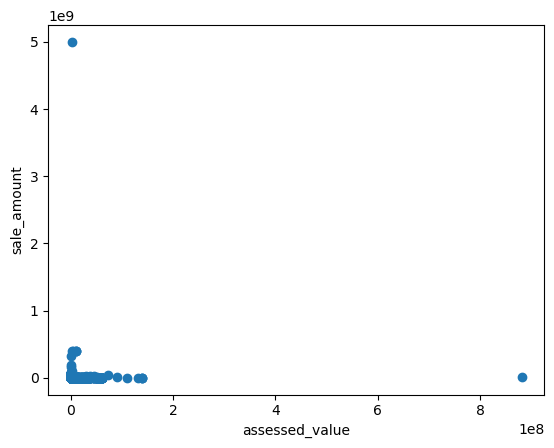

In [51]:
#plotting assessed_value against sale_amount for outliers
plt.scatter(outliers['assessed_value'], outliers['sale_amount'])
plt.xlabel('assessed_value')
plt.ylabel('sale_amount')

In [52]:
#displaying records removed between df inliers and df inliers2 ('sale_amount' > 300000000)
inliers.loc[inliers['sale_amount'] > 300000000]

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
229146,160393,2016,2016-12-06,Stamford,115 TOWNE STREET,50820110,395500000.0,0.128496,NaN,NaN
261341,160386,2016,2016-12-06,Stamford,120 TOWNE STREET,56144510,395500000.0,0.141958,NaN,NaN
263961,160394,2016,2016-12-06,Stamford,301-401 COMMONS PARK SOUTH # C,92447590,395500000.0,0.233749,NaN,NaN
269919,160392,2016,2016-12-06,Stamford,110 TOWNE STREET,23290450,395500000.0,0.058889,NaN,NaN


>Notes: the records removed from inliers to make inliers2 follow a pattern that appeared regularly in the outlier set. The patterns that followed was multiple properties with the exact same sale_amount, in the same town, often with the same date_recorded, and usually with unusually low sales_ratios individually but acceptable each assessed_value was combined and compared to the sale_amount. The pattern indicates that multiple properties were purchased as a group and the sale price for the group was recorded rather than the portion for that individual property.
<br><br>
Dropped 45,947 rows<br>
__Current dataset: 462,458 rows and 10 columns__

### Missing values checks

In [53]:
#Count the missing values in each col
inliers2.isnull().sum()

serial_number           0
list_year               0
date_recorded           0
town                    0
address                 3
assessed_value          0
sale_amount             0
sales_ratio             0
property_type       27279
residential_type    31965
dtype: int64

In [54]:
#examiming entries with NaN adrress values
inliers2.loc[inliers2['address'].isnull()]

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
196131,170165,2017,2017-12-08,Manchester,NaN,129300,224000.0,0.5772,Two Family,Two Family
216998,172767,2017,2018-01-12,Shelton,NaN,227500,500000.0,0.4550,Condo,Condo
218664,17001,2017,2017-10-02,North Haven,NaN,193130,242000.0,0.7980,Single Family,Single Family


>Notes: Only 3 NaN values in address. This should not interfere with the analysis so the records will be kept and address values left NaN.

In [55]:
#checking how many NaN property_types also have NaN residential_types
(inliers2['property_type'].isnull() & inliers2['residential_type'].isnull()).sum()

27279

In [56]:
#making a df of entries that have NaN property_types also have NaN residential_types
no_type = inliers2.loc[(inliers2['property_type'].isnull() & inliers2['residential_type'].isnull())]

In [57]:
#examining no_type entries
no_type.head(50)

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
1852,200468,2020,2021-05-19,Groton,59 C ST,9870,27000.0,0.365556,NaN,NaN
66592,19000104,2019,2019-12-19,Cheshire,325 SANDBANK RD UB3,78680,145000.0,0.542600,NaN,NaN
66596,190457,2019,2020-04-13,Hamden,2584 DIXWELL AVE,531370,1190000.0,0.446500,NaN,NaN
66598,19729,2019,2020-07-20,Hartford,271 WASHINGTON ST,245210,401670.0,0.610500,NaN,NaN
66599,190979,2019,2020-08-31,Bristol,888 FARMINGTON AVE,445060,670000.0,0.664300,NaN,NaN
66600,190068,2019,2020-07-01,Bethany,99 MESA DR,100140,105000.0,0.953700,NaN,NaN
66604,19365,2019,2020-01-31,Hartford,1005 ALBANY AVE,109410,165000.0,0.663100,NaN,NaN
66605,19176,2019,2020-07-27,East Haddam,8 TOM RD,31500,48000.0,0.656300,NaN,NaN
66607,190053,2019,2020-07-09,Kent,YUZA-MINI LA,147600,260000.0,0.567700,NaN,NaN
66611,190882,2019,2020-08-28,Hamden,3565 WHITNEY AVE,273210,262500.0,1.040800,NaN,NaN


>Notes: Little can be infered from entries without a property_type or residential_type. Entries will be dropped.

In [58]:
#making a df of entries that have a property_type, but no residential_type
just_prop = inliers2.loc[((inliers2['property_type'].isnull() == False) & (inliers2['residential_type'].isnull() == True))]

In [59]:
#looking at entries with just a property_type
just_prop.head(30)

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,NaN
8,200097,2020,2021-06-04,Bethany,23 AMITY RD,511000,795000.0,0.642700,Commercial,NaN
13,200804,2020,2021-09-28,Branford,119 MONTOWESE ST,455100,650000.0,0.700100,Commercial,NaN
26,200268,2020,2021-07-09,Colchester,347 CABIN RD,104000,350000.0,0.297100,Vacant Land,NaN
28,200024,2020,2020-11-09,Columbia,WEBSTER LANE,60300,75000.0,0.804000,Vacant Land,NaN
29,200074,2020,2021-09-01,Cornwall,131 KENT RD,246100,385000.0,0.639200,Commercial,NaN
31,200282,2020,2021-07-15,Coventry,1467 SOUTH ST,359800,480000.0,0.749500,Commercial,NaN
34,200077,2020,2020-12-08,Cromwell,60 NORTH RD,174650,259000.0,0.674300,Vacant Land,NaN
35,200195,2020,2021-04-26,Cromwell,34 SHUNPIKE ROAD,3360000,5214750.0,0.644300,Commercial,NaN
40,201186,2020,2021-07-12,Danbury,28 MAIN ST,695500,3200000.0,0.217344,Commercial,NaN


In [60]:
#All entries without residential_type seem to not be residential. Confirming theory with a frequency count
just_prop['property_type'].value_counts()

Vacant Land       2375
Commercial        1681
Apartments         427
Industrial         200
Public Utility       3
Name: property_type, dtype: int64

>Notes: All entries with a property_type, but no residential_type are simply not residential type properites. All entries are fine and will be left as is.

In [61]:
#making a new df from inliers2 without entries where property_type = NaN
all_props = inliers2.loc[(inliers['property_type'].isnull() == False)]

In [62]:
#checking new df
all_props.head(20)

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,NaN
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family
5,200109,2020,2020-12-09,Avon,57 FAR HILLS DRIVE,847520,1250000.0,0.678000,Residential,Single Family
7,2020313,2020,2021-07-01,Berlin,216 WATCH HILL RD,412000,677500.0,0.608100,Residential,Single Family
8,200097,2020,2021-06-04,Bethany,23 AMITY RD,511000,795000.0,0.642700,Commercial,NaN
9,20139,2020,2020-12-16,Bethel,16 DEEPWOOD DRIVE,171360,335000.0,0.511500,Residential,Single Family
10,200086,2020,2021-08-10,Bethlehem,39 WOODLAND RD,168900,352000.0,0.479800,Residential,Single Family


In [63]:
#checking new df
all_props.tail(20)

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type
508377,100012,2010,2010-10-25,Woodbridge,34 WEPAWAUG ROAD,284900,415000.0,0.686506,Single Family,Single Family
508379,10155,2010,2010-12-20,Milford,4 LOOKOUT HILL ROAD,269100,310000.0,0.868065,Condo,Condo
508381,100027,2010,2010-11-01,Branford,346 JEFFERSON WOODS,111100,139000.0,0.799281,Condo,Condo
508382,100117,2010,2010-10-15,Newington,85 WOODSEDGE DRIVE,65310,97000.0,0.673299,Condo,Condo
508383,10146,2010,2011-06-21,Bloomfield,19 CLAIRE LANE,358470,560000.0,0.640125,Single Family,Single Family
508384,10212,2010,2011-03-16,Hamden,4 SKY VIEW CIRCLE,181160,207500.0,0.873060,Single Family,Single Family
508386,10055,2010,2010-12-22,North Haven,9 ROBERTA ROAD,168980,190000.0,0.889368,Single Family,Single Family
508387,100846,2010,2011-06-28,Stamford,143 PALMERS HILL ROAD,738830,687500.0,1.074662,Single Family,Single Family
508388,10088,2010,2010-12-20,Groton,1 JOLIET CT,114240,128000.0,0.892500,Single Family,Single Family
508389,10076,2010,2011-03-04,Brookfield,89A LONG MEADOW HILL RD,349480,439000.0,0.796082,Single Family,Single Family


In [64]:
all_props.shape

(435179, 10)

>Notes: __address__ had 3 NaN values - should not interfere with analysis, so left as is.<br>
__property_type__ had 27279 NaN values all of which also had NaN residential_types. All property types with NaN values were dropped due to insufficient categorical information.<br>
__residential_type__ had 31965 NaN values. 27279 were dropped due to lack of property_type. Remaining 4,686 are non-residential types, thus should not have residential_type value and were left as is.
<br><br>
Dropped 27279 rows
__Current dataset: 435,179 rows and 10 columns__

### Duplicate checks

In [65]:
#Checking for duplicated entries
all_props.duplicated().sum()

0

>Notes: No duplicate entries found

### Contradictions checks

In [66]:
#comparing property_types and residential_types
all_props.groupby('property_type')['residential_type'].value_counts(dropna = False)

property_type   residential_type
Apartments      NaN                    427
Commercial      NaN                   1681
Condo           Condo                70277
Four Family     Four Family           1282
Industrial      NaN                    200
Public Utility  NaN                      3
Residential     Single Family        42463
                Condo                11945
                Two Family            3110
                Three Family          1472
                Four Family            256
Single Family   Single Family       277380
Three Family    Three Family          6998
Two Family      Two Family           15310
Vacant Land     NaN                   2375
Name: residential_type, dtype: int64

>Notes: residential_type is a subcategory of property_type: Residential. residential_has Single Family, Condo, Two Family, Three Family, and Four Family; property_type also has Single Family, Condo, Two Family, Three Family, and Four Family. property_type: Condo has only one residential_type which is Condo,  property_type: Single Family has only one residential_type which is Single Family, etc. This is redundant and unhelpful in the analysis.
<br><br>
property_types of Single Family, Condo, Two Family, Three Family, and Four Family will be changed to "Residential".

In [67]:
#Changing property_type: Single Family, Condo, Two Family, Three Family, and Four Family to 'Residential'
all_props.loc[(all_props['property_type'] == 'Single Family') |
              (all_props['property_type'] == 'Condo') |
              (all_props['property_type'] == 'Two Family') |
              (all_props['property_type'] == 'Three Family') |
              (all_props['property_type'] == 'Four Family'),
              'property_type'] = 'Residential'

C:\Users\theva\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [68]:
#checking property_types changes
all_props.groupby('property_type')['residential_type'].value_counts(dropna = False)

property_type   residential_type
Apartments      NaN                    427
Commercial      NaN                   1681
Industrial      NaN                    200
Public Utility  NaN                      3
Residential     Single Family       319843
                Condo                82222
                Two Family           18420
                Three Family          8470
                Four Family           1538
Vacant Land     NaN                   2375
Name: residential_type, dtype: int64

>Notes: All current residential_types add up to their previous constituent parts. Conversion was successful!

## 4. Exports

In [69]:
#exporting cleaned dataset
all_props.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'CTRE 2011-2021 CLEANED.pkl'))